In [39]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [12]:
#pretrained models
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [26]:
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [27]:
len(wv['apple'])

300

In [28]:
wv.similarity('apple','mango')

0.57518554

In [29]:
wv.similarity('mango','car')

0.11735024

In [30]:
pairs = [
    ('car','minivan'),
    ('car','bicycle'),
    ('car','airplane'),
    ('car','cereal'),
    ('car','communism')
]

for w1, w2 in pairs:
    print(w1, w2, wv.similarity(w1,w2))

car minivan 0.6907037
car bicycle 0.5364484
car airplane 0.42435578
car cereal 0.13924746
car communism 0.058202934


In [31]:
wv.most_similar(positive=['car','minivan'], topn=5)

[('SUV', 0.8532192707061768),
 ('vehicle', 0.8175783753395081),
 ('pickup_truck', 0.7763688564300537),
 ('Jeep', 0.7567334175109863),
 ('Ford_Explorer', 0.7565720081329346)]

In [32]:
wv.doesnt_match(['fire','water','land','sea','air','car'])

'car'

In [33]:
wv.most_similar(positive=['woman','king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [34]:
wv.most_similar(positive=['woman','king'], topn=3)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109)]

In [35]:
words = ['one', 'two', 'man', 'woman', 'table']

In [36]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

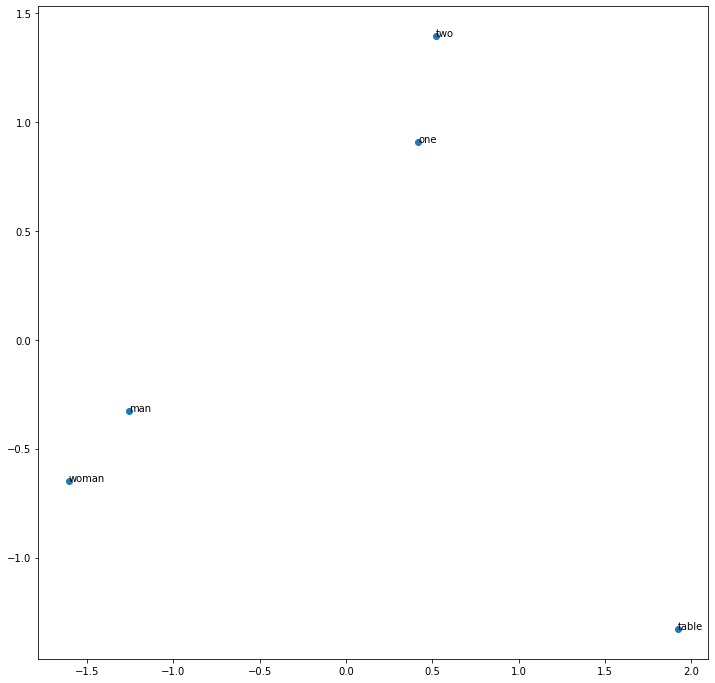

In [42]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [69]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1

    for w in sent.split(' '):
        if w in wv:
            ctr+=1
            wv_res += wv[w]

    wv_res = wv_res/ctr
    return wv_res

In [71]:
sent = 'i am happy'
vec = sent_vec(sent)

In [73]:
vec.shape

(300,)

### Transformers

In [80]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis',
                        model='cardiffnlp/twitter-roberta-base-sentiment')
classifier('food was amazing')

[{'label': 'LABEL_2', 'score': 0.9689906239509583}]

In [83]:
classifier = pipeline('sentiment-analysis')
classifier('food was amazing')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9998799562454224}]

In [86]:
classifier(["movie was not good", "class was useful"])

[{'label': 'NEGATIVE', 'score': 0.9997327923774719},
 {'label': 'POSITIVE', 'score': 0.998979389667511}]

In [88]:
question_answerer = pipeline('question-answering')

question_answerer(
    question='who is venkat',
    context = 'my name is venkat, i work as a data scientist'
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.46783018112182617,
 'start': 31,
 'end': 45,
 'answer': 'data scientist'}

In [92]:
ner = pipeline('ner', aggregation_strategy='simple')

ner('sundar pichai is ceo of Google')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity_group': 'ORG',
  'score': 0.995551,
  'word': 'Google',
  'start': 24,
  'end': 30}]

In [93]:
#there is text summarization also
generator = pipeline('text-generation')
generator('in this course, we will teach you')

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/Users/v0m01sk/miniconda3/envs/ml/lib/python3.7/site-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'in this course, we will teach you how to use "soul-structure" verbs in Latin by focusing on the "words" and the "verb" verbs.\n\nI used the term, soul-structure in Latin as in'}]